
# Project: Investigating 100000 medical appointments in brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

# Introduction

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

This dataset collects information from 100000 medical appointments in brazil and is focused on the question of whether or not patients show up for their appointment. This dataset was originally sourced from </https://www.kaggle.com/>

Questions to solve;

1. What are the top 5 ages of men that showed up the most for their appointment?
2. What's the proportion of male to female who showed up for their appointment?
3. What's the relationship between (age and gender), (gender and No_show), (age, gender and No_show)?
4. What's the number of males with hypertension that showed up for their appointment?

In [3]:
#Loading our dataset

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [4]:
#lets see top 5 samples of our data

df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Lets obtain more information about this dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Lets obtain statistical info of our dataset. Transposing, we obtain the following values for each features.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


# Data Wrangling

From the result obtained using .info(), we can see the datatype of each of our features. We noticed some features possess the wrong datatype which has to be changed later. Hence, the need for data wrangling

Data wrangling involves removing erros and combining complex datasets to make them more accessible and easier to analyze. Common Problems to look out for before analysis can be done are as follows; Check for

incorrect datatypes missing data duplicates structural problems like different column names mismatch number of records;

In [7]:
#Checking for missing or null values

df.isnull().sum().all()

False

In [8]:
#Checking for duplicates

df.duplicated().sum()

0

In [9]:
#Checking the Age features

df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [10]:
#Categorizing Neighbourhood

df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [11]:
#Categorizing Handicap

df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Regardless if the test is real or hypothetical, in reality, no human possesses a negative years as age hence, identifying the patient who's -1 year old and changing it to the closest value that isn't negative is important in our analysis

In [12]:
#From the above result, we know in reality that no person age can be -1, hence, lets locate the sample with age -1

df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
#replace the -1 age with 0, since its impossible for age to be -1

df.Age.replace({-1:0},inplace=True)

In [14]:
#AppointmentID wont make an significance in our prediction and so, we should remove this

df.drop(['AppointmentID'],axis=1,inplace=True)

In [15]:
#Checking for duplicates again. Though the dataset shows duplicates after the appointmentid was removed but this cant be removed cos these data seems to be very important

df.duplicated().sum()

618

In [16]:
#Renaming the columns

df.rename(columns={'Hipertension':'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'},inplace=True)

#### Solving datatype issues for each features

In [17]:
#Converting scholarship, hypertension, diabetes, alcoholism and sms_received to booleans

for b in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']:
    df[b] = df[b].astype('bool')

In [18]:
#Converting ScheduledDay and AppointmentDay to datetime dtype

for b in ['ScheduledDay', 'AppointmentDay']:
    df[b] = pd.to_datetime(df[b])

In [19]:
#Converting Gender, Neighbourhood, handicap

for b in ['Gender', 'Neighbourhood', 'Handicap']:
    df[b] = df[b].astype('category')

From the no_show column, we know when the response is NO, it means the patient made it for the appointment but when it's YES, it means the patient didnt make it.

In [20]:
#Replacing NO and YES with 0 and 1 inorder to easily convert the datatype

df.No_show.replace({'No': 1, 'Yes': 0},inplace=True)

In [21]:
df.No_show = df.No_show.astype('bool')

In [22]:
df.dtypes

PatientId                float64
Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood           category
Scholarship                 bool
Hypertension                bool
Diabetes                    bool
Alcoholism                  bool
Handicap                category
SMS_received                bool
No_show                     bool
dtype: object

In [23]:
#Checking our No_show feature

df.No_show.value_counts()

True     88208
False    22319
Name: No_show, dtype: int64

# Exploratory Data Analysis

No_show

In [24]:
#The number of people that did show up for an appointment. No_show is True i.e 1, if the patient showed up and False i.e 0, if the patient didnt show up

df[df['No_show'] == 1].No_show.count()

88208

In [25]:
#The number of people that didnt show up for an appointment

df[df['No_show'] == 0].No_show.count()

22319

Gender

In [26]:
#Total values of male and female patients

total_gender = df.groupby('Gender').count().Age
total_gender

Gender
F    71840
M    38687
Name: Age, dtype: int64

Neighbourhood

In [27]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

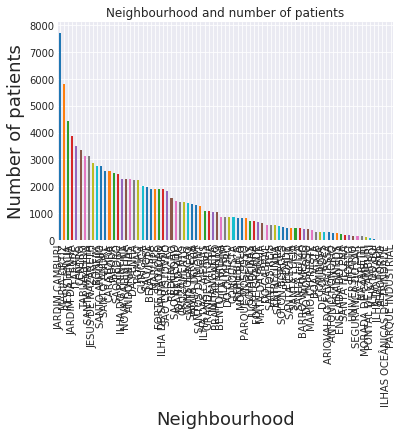

In [28]:
#Plot of Petients and their neighbourhood

df.Neighbourhood.value_counts().plot(kind='bar',title='Neighbourhood and number of patients',alpha=1)
plt.xlabel('Neighbourhood', fontsize=18)
plt.ylabel('Number of patients', fontsize=18);

From the above plot, it can be seen that JARDIM CAMBURI had the highest number of patients i.e 7717 patients while PARQUE INDUSTRIAL had just 1 patient

Hypertension

In [29]:
df.Hypertension.value_counts()

False    88726
True     21801
Name: Hypertension, dtype: int64

Relationships between two variables;

In [30]:
#Age and patients that showed up

df.groupby('Age').No_show.value_counts()

Age  No_show
0    True       2901
     False       639
1    True       1858
     False       415
2    True       1366
     False       252
3    True       1236
     False       277
4    True       1017
     False       282
5    True       1169
     False       320
6    True       1205
     False       316
7    True       1126
     False       301
8    True       1106
     False       318
9    True       1008
     False       364
10   True        970
     False       304
11   True        948
     False       247
12   True        820
     False       272
13   True        800
     False       303
14   True        802
     False       316
                ... 
86   False        42
87   True        157
     False        27
88   True        114
     False        12
89   True        144
     False        29
90   True         86
     False        23
91   True         53
     False        13
92   True         66
     False        20
93   True         43
     False        10
94   True         27


Relationship between Age and Gender

In [31]:
#Females and their age range

df.query('Gender == "F"').Age.value_counts().head(10)

0     1722
30    1164
56    1151
52    1149
53    1147
19    1123
51    1117
37    1114
38    1106
54    1102
Name: Age, dtype: int64

In [32]:
#Statistical data on the above relationship

df.query('Gender == "F"').Age.value_counts().describe()

count     103.000000
mean      697.475728
std       400.071852
min         1.000000
25%       359.500000
50%       784.000000
75%      1046.000000
max      1722.000000
Name: Age, dtype: float64

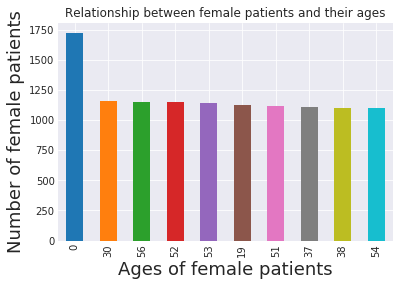

In [33]:
df.query('Gender == "F"').Age.value_counts().head(10).plot(kind='bar', title='Relationship between female patients and their ages')
plt.xlabel('Ages of female patients', fontsize=18)
plt.ylabel('Number of female patients', fontsize=18);

A plot displaying the relationship between female patients and their ages

In [34]:
df.query('Gender == "F"').Age.max()

115

In [35]:
#males and their age range

df.query('Gender == "M"').Age.value_counts().head(10)

0     1818
1     1185
2      861
5      832
9      786
6      768
8      759
3      749
7      740
10     705
Name: Age, dtype: int64

In [36]:
#Statistical data for the above relationship

df.query('Gender == "M"').Age.value_counts().describe()

count     100.000000
mean      386.870000
std       268.740409
min         1.000000
25%       191.000000
50%       395.500000
75%       493.750000
max      1818.000000
Name: Age, dtype: float64

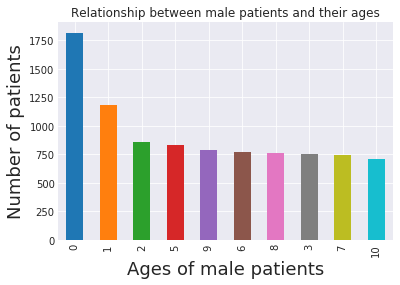

In [37]:
df.query('Gender == "M"').Age.value_counts().head(10).plot(kind='bar', title='Relationship between male patients and their ages')
plt.xlabel('Ages of male patients', fontsize=18)
plt.ylabel('Number of patients', fontsize=18);

A plot displaying the relationship between male patients and their ages

In [38]:
df.query('Gender == "M"').Age.max()

100

The following can be deduced from the above plots and statistical data;

* There were more patients of 0-yo for both males and females than any other ages.
* As age increases, both male and female patients decreased
* The mean number of female patients was 697 while for male patients, it was 387

Relationship between Gender and No_show

In [39]:
df.query('Gender == "M"').No_show.value_counts()

True     30962
False     7725
Name: No_show, dtype: int64

In [40]:
df.query('Gender == "F"').No_show.value_counts()

True     57246
False    14594
Name: No_show, dtype: int64

In [41]:
No_show_by_gender = df.groupby('Gender').No_show.value_counts()
No_show_by_gender

Gender  No_show
F       True       57246
        False      14594
M       True       30962
        False       7725
Name: No_show, dtype: int64

In [42]:
No_show_by_gender.describe(include='all')

count        4.000000
mean     27631.750000
std      22017.841165
min       7725.000000
25%      12876.750000
50%      22778.000000
75%      37533.000000
max      57246.000000
Name: No_show, dtype: float64

In [43]:
#Calculate frequencies of No_show for females

No_show_femaleProp = No_show_by_gender['F']/total_gender['F']
No_show_femaleProp

No_show
True     0.796854
False    0.203146
Name: No_show, dtype: float64

In [44]:
No_show_femaleProp.describe()

count    2.000000
mean     0.500000
std      0.419815
min      0.203146
25%      0.351573
50%      0.500000
75%      0.648427
max      0.796854
Name: No_show, dtype: float64

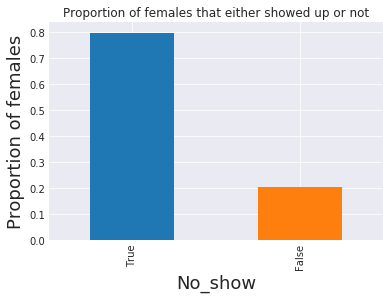

In [45]:
No_show_femaleProp.plot(kind='bar', title='Proportion of females that either showed up or not')
plt.xlabel('No_show', fontsize=18)
plt.ylabel('Proportion of females', fontsize=18);

A graph showing the proportion of females that either showed up or not

In [46]:
#Calculate frequencies of No_show for males

No_show_maleProp = No_show_by_gender['M']/total_gender['M']
No_show_maleProp

No_show
True     0.800321
False    0.199679
Name: No_show, dtype: float64

In [47]:
No_show_maleProp.describe()

count    2.000000
mean     0.500000
std      0.424717
min      0.199679
25%      0.349840
50%      0.500000
75%      0.650160
max      0.800321
Name: No_show, dtype: float64

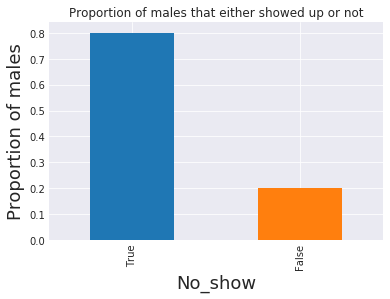

In [48]:
No_show_maleProp.plot(kind='bar', title='Proportion of males that either showed up or not')
plt.xlabel('No_show', fontsize=18)
plt.ylabel('Proportion of males', fontsize=18);

A graph showing the proportion of males that either showed up or not

In [49]:
#Male to female proportion

No_show_maleProp/No_show_femaleProp

No_show
True     1.004350
False    0.982936
Name: No_show, dtype: float64

The above plots show the proportion of males and females that either showed up or not. It can therefore be concluded that approximately 80% of males and females in total showed up for their appointments even though there were more women overall.

In [50]:
def countp(col_name):
    sns.countplot(col_name)

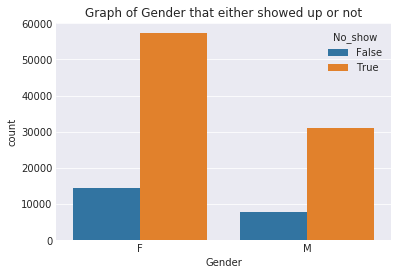

In [51]:
#The relationship between gender and No_show. this shows us the gender with a higher chance of showing up

sns.countplot(df.Gender,hue=df['No_show']).set_title('Graph of Gender that either showed up or not');

This plot shows males and females that either showed up or not for their appointment

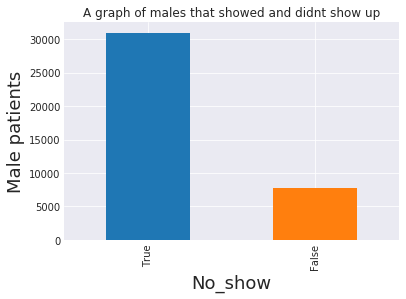

In [52]:
df.query('Gender == "M"').No_show.value_counts().plot(kind='bar', title='A graph of males that showed and didnt show up')
plt.xlabel('No_show', fontsize=18)
plt.ylabel('Male patients', fontsize=18);

A graph that shows male patients that either showed up or not for their appointment.

More male patients showed up for their appointment while less than 10000 didnt show up

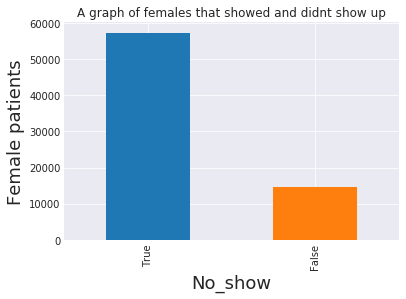

In [53]:
df.query('Gender == "F"').No_show.value_counts().plot(kind='bar', title='A graph of females that showed and didnt show up')
plt.xlabel('No_show', fontsize=18)
plt.ylabel('Female patients', fontsize=18);

From the above graphs and statistical data, the following can be deduced;

* Over 57000 females and 30000 males showed up for their appointments
* The amount of males and females that didnt show up was less than 25% of each total.
* The probability of either a male or female showing up is more than not showing up

In [54]:
#Gender and Neighbourhood

df.groupby('Gender').Neighbourhood.value_counts()

Gender  Neighbourhood      
F       JARDIM CAMBURI         5144
        MARIA ORTIZ            3735
        RESISTÊNCIA            2913
        JARDIM DA PENHA        2665
        ITARARÉ                2266
        TABUAZEIRO             2022
        SANTA MARTHA           2016
        CENTRO                 1970
        JESUS DE NAZARETH      1811
        SANTO ANTÔNIO          1811
        BONFIM                 1738
        SANTO ANDRÉ            1697
        CARATOÍRA              1681
        JABOUR                 1628
        ILHA DO PRÍNCIPE       1550
        SÃO PEDRO              1536
        DA PENHA               1515
        NOVA PALESTINA         1498
        ANDORINHAS             1482
        ROMÃO                  1388
        SÃO JOSÉ               1279
        GURIGICA               1275
        ILHA DE SANTA MARIA    1259
        BELA VISTA             1257
        MARUÍPE                1255
        SÃO CRISTÓVÃO          1207
        FORTE SÃO JOÃO         1202


In [55]:
#Neighbourhood with their patients that were awarded a scholarship

df.query('Scholarship == True').Neighbourhood.value_counts()

ILHA DO PRÍNCIPE               579
TABUAZEIRO                     537
RESISTÊNCIA                    468
CARATOÍRA                      456
SANTA MARTHA                   441
GURIGICA                       422
SÃO BENEDITO                   404
BONFIM                         373
SANTO ANDRÉ                    334
ANDORINHAS                     323
SÃO PEDRO                      321
ITARARÉ                        311
NOVA PALESTINA                 310
DA PENHA                       292
JABOUR                         272
JESUS DE NAZARETH              270
SANTOS DUMONT                  235
BELA VISTA                     225
JOANA D´ARC                    219
ILHA DAS CAIEIRAS              203
SANTA TEREZA                   201
CONSOLAÇÃO                     199
SÃO JOSÉ                       180
ROMÃO                          178
SÃO CRISTÓVÃO                  174
CRUZAMENTO                     170
JARDIM CAMBURI                 159
REDENÇÃO                       156
SANTO ANTÔNIO       

In [56]:
#Neighbourhoods with their patients that showed up

df.query('No_show == True').Neighbourhood.value_counts()

JARDIM CAMBURI                 6252
MARIA ORTIZ                    4586
RESISTÊNCIA                    3525
JARDIM DA PENHA                3246
SANTA MARTHA                   2635
CENTRO                         2631
ITARARÉ                        2591
TABUAZEIRO                     2559
SANTO ANTÔNIO                  2262
BONFIM                         2223
JESUS DE NAZARETH              2157
SANTO ANDRÉ                    2063
JABOUR                         2058
CARATOÍRA                      1974
SÃO PEDRO                      1933
NOVA PALESTINA                 1862
DA PENHA                       1788
ANDORINHAS                     1741
ROMÃO                          1741
ILHA DO PRÍNCIPE               1734
GURIGICA                       1562
SÃO JOSÉ                       1549
FORTE SÃO JOÃO                 1543
ILHA DE SANTA MARIA            1524
BELA VISTA                     1523
MARUÍPE                        1478
SÃO CRISTÓVÃO                  1473
REDENÇÃO                    

In [57]:
#Statisical rep of the relationship between Neighbourhood and No_show

df.query('No_show == True').Neighbourhood.value_counts().describe(include='all')

count      81.000000
mean     1088.987654
std      1096.260581
min         0.000000
25%       321.000000
50%       709.000000
75%      1562.000000
max      6252.000000
Name: Neighbourhood, dtype: float64

In [58]:
#Correlation between features i.e variables

df.corr('pearson')

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show
PatientId,1.000000,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.009749,0.001461
Age,-0.004139,1.000000,-0.092457,0.504586,0.292392,0.095811,0.012643,0.060319
Scholarship,-0.002880,-0.092457,1.000000,-0.019729,-0.024894,0.035022,0.001194,-0.029135
Hypertension,-0.006441,0.504586,-0.019729,1.000000,0.433086,0.087971,-0.006267,0.035701
Diabetes,0.001605,0.292392,-0.024894,0.433086,1.000000,0.018474,-0.014550,0.015180
Alcoholism,0.011011,0.095811,0.035022,0.087971,0.018474,1.000000,-0.026147,0.000196
SMS_received,-0.009749,0.012643,0.001194,-0.006267,-0.014550,-0.026147,1.000000,-0.126431
No_show,0.001461,0.060319,-0.029135,0.035701,0.015180,0.000196,-0.126431,1.000000


Relationship between more than two variables;

Age, Gender and No_show

In [59]:
#Ages of females that showed up for their appointment

df.query('Gender == "F" and No_show == True').Age.value_counts()

0      1403
56      989
52      951
53      934
51      930
54      901
37      893
1       886
38      884
50      881
49      879
30      873
57      868
36      859
33      858
32      857
39      852
59      850
60      849
19      843
34      837
45      835
28      831
58      826
21      823
29      821
31      811
18      808
47      807
20      802
       ... 
76      351
72      350
74      349
75      308
80      302
77      295
78      288
81      242
79      206
82      205
84      167
86      158
85      154
83      153
87      114
89      107
88       84
90       58
92       46
91       44
93       23
95       14
94       13
96       12
97        8
98        4
102       2
115       2
100       2
99        1
Name: Age, Length: 103, dtype: int64

top 5 ages of men that showed up the most for their appointments

In [60]:
df.query('Gender == "M" and No_show == True').Age.value_counts().head(5)

0    1498
1     972
2     720
5     657
3     615
Name: Age, dtype: int64

In [61]:
df.query('Gender == "M" and No_show == True').Age.value_counts().describe()

count     100.000000
mean      309.620000
std       217.014629
min         1.000000
25%       164.000000
50%       308.500000
75%       389.250000
max      1498.000000
Name: Age, dtype: float64

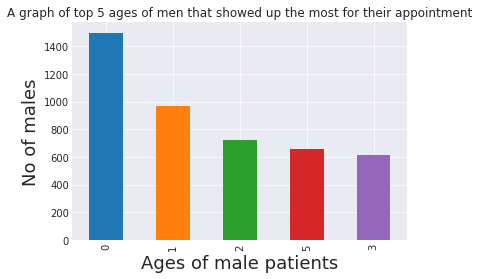

In [62]:
df.query('Gender == "M" and No_show == True').Age.value_counts().head(5).plot(kind="bar", title='A graph of top 5 ages of men that showed up the most for their appointment')
plt.xlabel('Ages of male patients', fontsize=18)
plt.ylabel('No of males', fontsize=18);

From the above graph, it can be seen as age increases, the likelihood for a man to show up for an appointment decreases. To further buttress this point, lets check the bottom 5 ages and compare. Also, from the statistical data above, the mean number of men was 892.

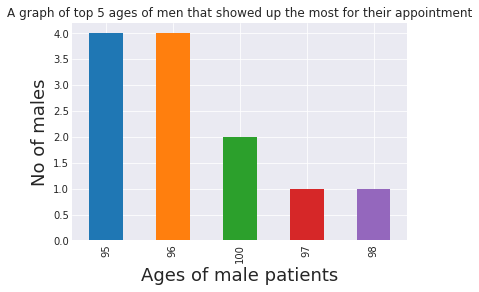

In [63]:
df.query('Gender == "M" and No_show == True').Age.value_counts().tail(5).plot(kind="bar", title='A graph of top 5 ages of men that showed up the most for their appointment')
plt.xlabel('Ages of male patients', fontsize=18)
plt.ylabel('No of males', fontsize=18);

The graph further buttresses our point as can be seen above

In [64]:
#Ages of males that showed up for their appointment

df.query('Gender == "M" and No_show == True').Age.value_counts()

0      1498
1       972
2       720
5       657
3       615
6       609
7       594
8       583
9       558
4       539
10      533
59      507
63      506
52      498
11      488
49      475
57      457
50      441
38      425
64      421
46      418
13      405
53      398
12      391
58      390
44      389
55      388
40      386
56      383
66      379
       ... 
73      225
70      221
71      196
74      164
78      164
72      164
75      155
77      153
76      129
81      129
80      128
79      123
82      121
84      109
85       72
83       66
86       60
87       43
89       37
88       30
90       28
92       20
93       20
94       14
91        9
95        4
96        4
100       2
97        1
98        1
Name: Age, Length: 100, dtype: int64

In [65]:
#Ages of males that didnt show up for their appointment

df.query('Gender == "M" and No_show == False').Age.value_counts().head(7)

0     320
9     228
1     213
8     176
5     175
10    172
14    159
Name: Age, dtype: int64

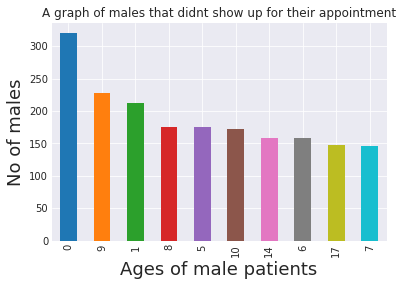

In [66]:
df.query('Gender == "M" and No_show == False').Age.value_counts().head(10).plot(kind="bar", title='A graph of males that didnt show up for their appointment')
plt.xlabel('Ages of male patients', fontsize=18)
plt.ylabel('No of males', fontsize=18);

A graph that shows the ages of male patients that didnt show up for their appointment

In [67]:
#Ages of females that didnt show up for their appointment

df.query('Gender == "F" and No_show == False').Age.value_counts().head(20)

0     319
30    291
19    280
21    270
25    268
22    266
29    263
20    262
23    258
28    255
17    249
18    248
33    240
39    240
31    235
24    231
34    230
41    229
36    229
27    227
Name: Age, dtype: int64

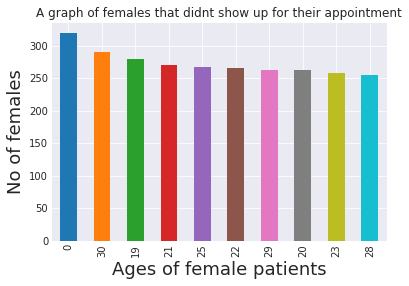

In [68]:
df.query('Gender == "F" and No_show == False').Age.value_counts().head(10).plot(kind="bar", title='A graph of females that didnt show up for their appointment')
plt.xlabel('Ages of female patients', fontsize=18)
plt.ylabel('No of females', fontsize=18);

A graph that shows the ages of female patients that didnt show up for their appointment 

In [69]:
df.query('Gender == "F" and No_show == False').Age.value_counts().describe()

count    100.000000
mean     145.940000
std       87.137743
min        1.000000
25%       62.000000
50%      156.000000
75%      221.000000
max      319.000000
Name: Age, dtype: float64

The same conclusion with top 5 ages of men that showed up for their appointments can also be deduced for (Age, Gender and No_show) relationships. There happens to be an inverse relationship between all 3 above for those that either showed up or not 

In [70]:
#The neighbourhood with scholarships that showed up for appointment

df.query('Scholarship == True and No_show == True').Neighbourhood.value_counts()

ILHA DO PRÍNCIPE               438
TABUAZEIRO                     433
RESISTÊNCIA                    374
CARATOÍRA                      352
SANTA MARTHA                   344
SÃO BENEDITO                   327
GURIGICA                       311
BONFIM                         283
SÃO PEDRO                      255
SANTO ANDRÉ                    255
NOVA PALESTINA                 243
ANDORINHAS                     231
ITARARÉ                        222
JESUS DE NAZARETH              208
DA PENHA                       207
JABOUR                         199
BELA VISTA                     178
JOANA D´ARC                    173
SANTOS DUMONT                  171
ILHA DAS CAIEIRAS              160
CONSOLAÇÃO                     158
SANTA TEREZA                   147
SÃO CRISTÓVÃO                  138
SÃO JOSÉ                       133
ROMÃO                          131
CRUZAMENTO                     125
REDENÇÃO                       125
JARDIM CAMBURI                 116
CENTRO              

In [71]:
#The neighbourhood without scholarship that showed up for appointment

df.query('Scholarship == False and No_show == True').Neighbourhood.value_counts()

JARDIM CAMBURI                 6136
MARIA ORTIZ                    4502
JARDIM DA PENHA                3236
RESISTÊNCIA                    3151
CENTRO                         2520
ITARARÉ                        2369
SANTA MARTHA                   2291
SANTO ANTÔNIO                  2160
TABUAZEIRO                     2126
JESUS DE NAZARETH              1949
BONFIM                         1940
JABOUR                         1859
SANTO ANDRÉ                    1808
SÃO PEDRO                      1678
CARATOÍRA                      1622
NOVA PALESTINA                 1619
ROMÃO                          1610
DA PENHA                       1581
ANDORINHAS                     1510
ILHA DE SANTA MARIA            1506
FORTE SÃO JOÃO                 1434
SÃO JOSÉ                       1416
MARUÍPE                        1393
BELA VISTA                     1345
SÃO CRISTÓVÃO                  1335
ILHA DO PRÍNCIPE               1296
GURIGICA                       1251
REDENÇÃO                    

In [72]:
#The neighbourhood without scholarships that didnt show up for appointment

df.query('Scholarship == False and No_show == False').Neighbourhood.value_counts()

JARDIM CAMBURI                 1422
MARIA ORTIZ                    1184
ITARARÉ                         834
RESISTÊNCIA                     812
CENTRO                          671
JESUS DE NAZARETH               634
JARDIM DA PENHA                 630
CARATOÍRA                       487
TABUAZEIRO                      469
BONFIM                          460
SÃO PEDRO                       449
SANTO ANTÔNIO                   435
ANDORINHAS                      429
SANTO ANDRÉ                     429
ROMÃO                           427
SANTA MARTHA                    399
ILHA DO PRÍNCIPE                391
MARUÍPE                         388
SÃO JOSÉ                        381
JABOUR                          378
ILHA DE SANTA MARIA             356
GURIGICA                        345
DA PENHA                        344
BELA VISTA                      337
NOVA PALESTINA                  335
SÃO CRISTÓVÃO                   327
FORTE SÃO JOÃO                  315
SANTOS DUMONT               

In [73]:
#The neighbourhood without scholarships that didnt show up for appointment

df.query('Scholarship == True and No_show == False').Neighbourhood.value_counts()

ILHA DO PRÍNCIPE               141
GURIGICA                       111
CARATOÍRA                      104
TABUAZEIRO                     104
SANTA MARTHA                    97
RESISTÊNCIA                     94
ANDORINHAS                      92
BONFIM                          90
ITARARÉ                         89
DA PENHA                        85
SANTO ANDRÉ                     79
SÃO BENEDITO                    77
JABOUR                          73
NOVA PALESTINA                  67
SÃO PEDRO                       66
SANTOS DUMONT                   64
JESUS DE NAZARETH               62
SANTA TEREZA                    54
SANTO ANTÔNIO                   49
SÃO JOSÉ                        47
ROMÃO                           47
BELA VISTA                      47
JOANA D´ARC                     46
CRUZAMENTO                      45
PRAIA DO SUÁ                    45
JARDIM CAMBURI                  43
ILHA DAS CAIEIRAS               43
CONSOLAÇÃO                      41
DO MOSCOSO          

We can see from above, the relationships that exist between those with or without scholarship that either attended or missed their appointments for each neighbourhood.

In [74]:
#Females with scholarship that are handicapped

df.query('Gender == "F" and Scholarship == True and Handicap == True').count().Gender

116

In [75]:
#Males with scholarship that are handicapped

df.query('Gender == "M" and Scholarship == True and Handicap == True').count().Gender

44

Males with hypertension that showed up for their appointments;

In [76]:
df.query('Gender == "M" and No_show == True').Hypertension.value_counts()

False    25615
True      5347
Name: Hypertension, dtype: int64

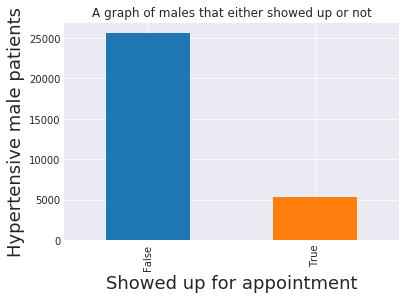

In [77]:
#Male patients that are either hypertensive or not that showed up for appointment

df.query('Gender == "M" and No_show == True').Hypertension.value_counts().plot(kind='bar',title='A graph of males that either showed up or not')
plt.xlabel('Showed up for appointment', fontsize=18)
plt.ylabel('Hypertensive male patients', fontsize=18);

From the above plot, just above 5000 patients that were hypertensive showed up for their appointment while over 25000 had no hypertension

In [78]:
df.query('Gender == "M" and No_show == True').Hypertension.value_counts().describe()

count        2.000000
mean     15481.000000
std      14331.640241
min       5347.000000
25%      10414.000000
50%      15481.000000
75%      20548.000000
max      25615.000000
Name: Hypertension, dtype: float64

In [79]:
#Males with hypertension that showed up for appointment

df.query('Gender == "M" and Hypertension == True and No_show == True').count().Gender

5347

From the above, the following can be deduced;
* 5347 Hypertension patients showed up for their appointment as against 25615 patients that didnt show up
* More male hypertensive patients refused to show up for their appoints
* A total of 30962 males were hypertensive and only about 17% of them showed up for their appointments.

In [80]:
#Females with hypertension that showed up for appointment

df.query('Gender == "F" and Hypertension == True and No_show == True').count().Gender

12682

In [81]:
df.query('Gender == "F" and No_show == True').Hypertension.value_counts()

False    44564
True     12682
Name: Hypertension, dtype: int64

In [82]:
#Ages of males that showed up for their appointment

df.query('Gender == "M" and No_show == True').Age.value_counts()

0      1498
1       972
2       720
5       657
3       615
6       609
7       594
8       583
9       558
4       539
10      533
59      507
63      506
52      498
11      488
49      475
57      457
50      441
38      425
64      421
46      418
13      405
53      398
12      391
58      390
44      389
55      388
40      386
56      383
66      379
       ... 
73      225
70      221
71      196
74      164
78      164
72      164
75      155
77      153
76      129
81      129
80      128
79      123
82      121
84      109
85       72
83       66
86       60
87       43
89       37
88       30
90       28
92       20
93       20
94       14
91        9
95        4
96        4
100       2
97        1
98        1
Name: Age, Length: 100, dtype: int64

In [83]:
#Males and Females with hypertension and diabetes that showed up for their appointments

df.query('Hypertension == True and Diabetes == True and No_show == True').Gender.value_counts()

F    3851
M    1494
Name: Gender, dtype: int64

In [84]:
#Males and Females with hypertension and diabetes that showed up for their appointments after receiving sms notification

df.query('Hypertension == True and Diabetes == True and SMS_received == True and No_show == True').Gender.value_counts()

F    1060
M     439
Name: Gender, dtype: int64

In [85]:
#Females that are handicapped in a particular neighbourhood
df.query('Gender == "F" and Handicap == True').Neighbourhood.value_counts()

SANTO ANTÔNIO                  72
TABUAZEIRO                     57
CENTRO                         55
SÃO JOSÉ                       50
SANTA MARTHA                   48
DA PENHA                       44
ANDORINHAS                     44
REDENÇÃO                       44
JARDIM DA PENHA                41
RESISTÊNCIA                    41
ITARARÉ                        38
SÃO PEDRO                      38
BELA VISTA                     36
SANTO ANDRÉ                    34
DO QUADRO                      34
CARATOÍRA                      33
MATA DA PRAIA                  33
SÃO CRISTÓVÃO                  27
JESUS DE NAZARETH              27
BONFIM                         25
SANTA TEREZA                   25
NOVA PALESTINA                 23
VILA RUBIM                     21
FONTE GRANDE                   20
MARUÍPE                        19
ESTRELINHA                     16
GURIGICA                       16
PRAIA DO SUÁ                   14
GRANDE VITÓRIA                 14
ROMÃO         

In [86]:
#Males that are handicapped in a particular neighbourhood
df.query('Gender == "M" and Handicap == True').Neighbourhood.value_counts()

GRANDE VITÓRIA                 46
SANTA MARTHA                   37
RESISTÊNCIA                    36
NOVA PALESTINA                 36
JARDIM DA PENHA                32
BELA VISTA                     32
ANDORINHAS                     30
DA PENHA                       30
SANTO ANTÔNIO                  27
SÃO PEDRO                      27
CENTRO                         27
JESUS DE NAZARETH              26
SANTO ANDRÉ                    25
SÃO BENEDITO                   23
ITARARÉ                        23
CARATOÍRA                      22
SANTA TEREZA                   21
SÃO JOSÉ                       21
MATA DA PRAIA                  21
PRAIA DO SUÁ                   19
MARUÍPE                        19
HORTO                          18
TABUAZEIRO                     18
GOIABEIRAS                     16
BONFIM                         15
GURIGICA                       15
ESTRELINHA                     13
ILHA DO PRÍNCIPE               13
VILA RUBIM                     13
ROMÃO         

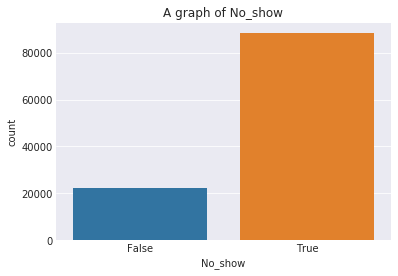

In [87]:
#Appointment distribution

sns.countplot(df['No_show']).set_title('A graph of No_show');

A graph showing the number of patients that either showed up or didnt.

from the above, it can be deduced that more patients showed up for their appointments

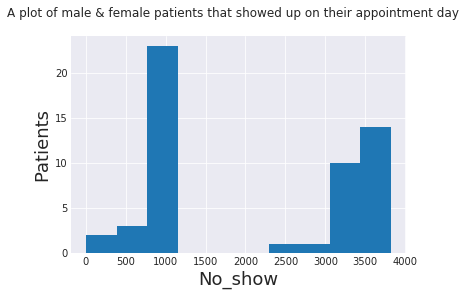

In [88]:
df.groupby(['AppointmentDay', 'No_show'])['Gender'].count().plot(kind='hist', subplots=True, sharey=True, title='A plot of male & female patients that showed up on their appointment day')
plt.xlabel('No_show', fontsize=18)
plt.ylabel('Patients', fontsize=18);

The above is a plot of male and female patients that showed up on their appointment day

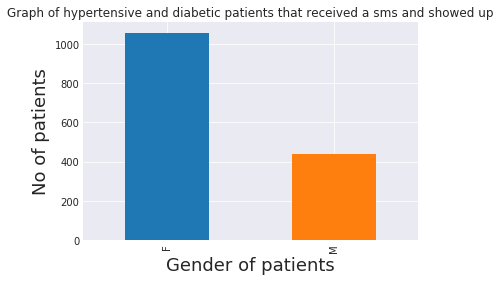

In [89]:
#Hypertensive and diabetic patients that got a text and showed up for an appointment

df.query('Hypertension == True and Diabetes == True and SMS_received == True and No_show == True').Gender.value_counts().plot(kind='bar', title='Graph of hypertensive and diabetic patients that received a sms and showed up')
plt.xlabel('Gender of patients', fontsize=18)
plt.ylabel('No of patients', fontsize=18);

The plot above shows the males and females who are both hypertensive and diabetic that got a text before showing up for their appointment

# Conclusion

From the above analysis and visualisation, the following can be observed based on questions asked;

* Men that were 0-yo, showed up the most for their appointments. They were about 1498
* 80% men showed up for their appointments as against 79.6% women that showed up for their appointments. The % difference amongst gender can be said to be negligible since it's just about 0.4%
* The oldest females were 115yo while the oldest men were 100yo. Hence, it can be seen they were more younger men than women as can be seen from the youngest males and females.
* 57246 females out of 71840 showed up for their appointment while about 30962 males out of 38687 showed up for their appointments.
* 1403 females of 0-yo showed up for their appointment while 1498 males of same age showed up for their appointment. It can be seen the lower the age, the higher their chances of making it to their appointment since less than 12 females of age 98 and above were able to show up while less than 13 males of age 95 and above did same.
* 5347 males with hypertension showed up for their appointment

From the above analysis, it can be seen that age plays a pivotal role in patients showing up for their appointments. The older we become, the less willing we are to make it for appointment.
Also, it can be seen that more women suffers from hypertension and diabetes. This may not be accurate since the values of our dataset are hypothetical.
Furthermore, I hope to explore real life dataset in future to ascertain these findings and to confirm if my hypothetical testing conforms with it.


LIMITATIONS:
* This dataset are hypothetical tests and can't be used in a real world settings. Hence, conclusion obtained from this result may differ in real world.

# References

</https://stackoverflow.com/> </https://google.com/>

In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0